<a href="https://colab.research.google.com/github/sudheerdas43/AI-Lab-Kmeans-Clustering/blob/main/KmeansClustering_2feature_2clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster Assignments: [1 1 1 1 0 0 0 0 1 1 0 0]
Final Centroids:
 [[5.25   5.55  ]
 [1.4833 1.7167]]
Within-Cluster Sum of Squares (WCSS): 1.4467


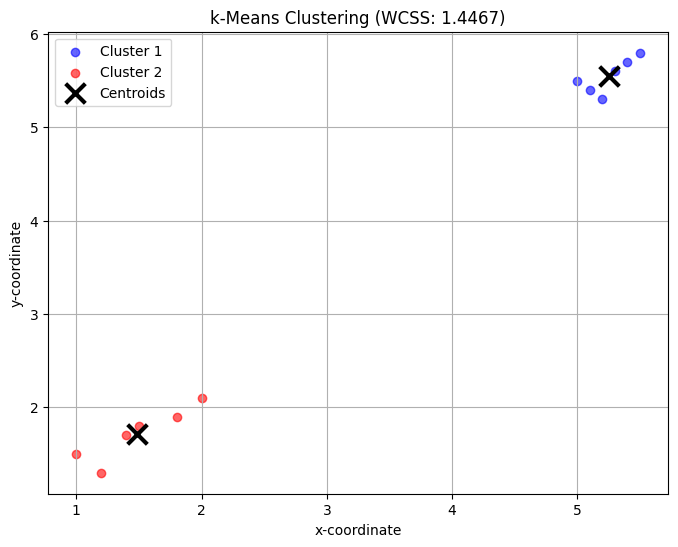

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.assignments = None

    def fit(self, X):
        # Initialize centroids randomly within data range
        n_samples, n_features = X.shape
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)
        self.centroids = np.random.uniform(min_vals, max_vals, (self.k, n_features))

        for _ in range(self.max_iters):
            # Assign points to nearest centroid
            old_centroids = self.centroids.copy()
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.assignments = np.argmin(distances, axis=0)

            # Update centroids
            for i in range(self.k):
                if np.sum(self.assignments == i) > 0:  # Avoid empty clusters
                    self.centroids[i] = np.mean(X[self.assignments == i], axis=0)

            # Check for convergence
            if np.all(np.abs(old_centroids - self.centroids) < self.tol):
                break

        # Calculate WCSS
        wcss = 0
        for i in range(self.k):
            cluster_points = X[self.assignments == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i])**2)

        return self.assignments, self.centroids, wcss

def plot_clusters(X, assignments, centroids, wcss):
    plt.figure(figsize=(8, 6))
    # Plot data points
    colors = ['blue', 'red']
    for i in range(2):
        cluster_points = X[assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i],
                   label=f'Cluster {i+1}', alpha=0.6)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x',
                s=200, linewidths=3, label='Centroids')

    plt.title(f'k-Means Clustering (WCSS: {wcss:.4f})')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset
data = np.array([
    [1.0, 1.5], [1.5, 1.8], [1.2, 1.3], [1.4, 1.7],
    [5.0, 5.5], [5.5, 5.8], [5.2, 5.3], [5.4, 5.7],
    [2.0, 2.1], [1.8, 1.9], [5.1, 5.4], [5.3, 5.6]
])

# Run k-Means
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    kmeans = KMeans(k=2)
    assignments, centroids, wcss = kmeans.fit(data)

    # Print results
    print("Cluster Assignments:", assignments)
    print("Final Centroids:\n", np.round(centroids, 4))
    print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.4f}")

    # Visualize
    plot_clusters(data, assignments, centroids, wcss)